# Введение
Деревья решений — это один из ключевых методов машинного обучения, который позволяет моделировать процессы принятия решений. Они играют важную роль как в теории, так и в практике анализа данных, так как обладают интуитивно понятной интерпретацией. На лекции вы познакомились с основными принципами построения деревьев решений, их структурой и свойствами. Сегодня мы продолжим углублять наше понимание и узнаем, как улучшать модели на базе деревьев, а также рассмотрим их применение на реальных данных.

Давайте рассмотрим практическое занятие по теме "Деревья решений" на примере всемирно известного набора данных Titanic, который используется для предсказания выживания пассажиров на основании их характеристик (пол, возраст, класс билета и т.д.).

План занятия:
### 1. Предобработка данных
   - Обработаем пропущенные значения, если они есть (например, заполните возраст медианой или средним, категориальные — самым популярным значением).
   - Преобразем категориальные признаки в числовые:
     - Например, `sex` → {Male: 0, Female: 1}.
     - One-hot encoding для многозначных категорий (например, для `embarked`).
   - Выберем ключевые признаки для модели (например, `pclass`, `sex`, `age`, `fare`, `embarked` и др.).
   - Разделим данные на обучающую и тестовую выборки (например, 80/20).

---

### 2. Построение модели
   - Используем модель дерева решений (например, `DecisionTreeClassifier` из библиотеки `sklearn`).
   - Настроем параметры:
     - `criterion` — выберите критерий (например, `gini` или `entropy`).
     - Ограничим глубину дерева (`max_depth`), чтобы избежать переобучения.
   - Обучим модель на тренировочных данных.

---

### 3. Оценка модели
   - Проверим качество модели на тестовых данных:
     - Используем метрики классификации: `accuracy`, `precision`, `recall`, `F1-score`.
   - Проанализируем матрицу ошибок.

---

### 4. Анализ результатов
   - Оценим важность признаков (`feature_importances_`).
   - Визуализируем дерево решений (`plot_tree` в sklearn).

---

### 5. Сравнение
   - Сравним результаты с логистической регрессией

# Этап 1: Постановка задачи и цель анализа

## Что делаем и зачем:  
В рамках данной практики мы будем предсказывать, выжил пассажир "Титаника" или нет, используя алгоритм дерева решений. Это задача классификации: целевой признак survived	 имеет два класса — 1 (выжил) и 0 (не выжил).

>>> Цель занятия:  
Научиться применять деревья решений для классификации, интерпретировать модель, анализировать её поведение и результат. В будущем это поможет понимать основы работы моделей и подбирать подходящие методы анализа данных.


# Этап 2: Загрузка данных и их изучение

#### Действия:
1. Загрузим данные Titanic, например, из библиотеки `Seaborn` или Kaggle.
2. Проверим первые строки данных, чтобы понять их структуру.

In [74]:
import pandas as pd
import seaborn as sns

# Загружаем данные Titanic
data = sns.load_dataset('titanic')

# Просматриваем первые строки
data.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Рефлексия:  
1. **Общая информация**:
   - DataFrame содержит **891 запись** (от 0 до 890).
   - Всего **15 столбцов**.

2. **Колонки и их типы данных**:
   - Колонки представлены разными типами данных:
     - `int64`: 4 столбца - `survived`, `pclass`, `sibsp`, `parch`.
     - `float64`: 2 столбца - `age`, `fare`.
     - `object`: 5 столбцов - `sex`, `embarked`, `class`, `who`, `embark_town`.
     - `bool`: 4 столбца - `adult_male`, `alive`, `deck`, `alone`.

3. **Пропущенные значения**:
   - Фактически только две колонки содержат **неполные данные**:
     - `age`: только 714 значений из 891 (пропущено 177).
     - `embarked` и `embark_town`: по 889 значений из 891 (пропущено 2 значения).
   - Остальные колонки являются **полностью заполненными**.

### Основные выводы:
1. **Пропуски в данных**:
   - Необходимо работать с пропущенными значениями (например, в `age` и `embarked`). Это может включать заполнение пропусков (импутация) или удаление строк с пропусками.

2. **Переменные c типом `object`**:
   - Столбцы `sex`, `embarked`, `class`, `who`, `embark_town` следует преобразовать в тип `category` для уменьшения расхода памяти и оптимизации.

3. **Использование булевых столбцов**:
   - Колонки `adult_male`, `alive`, `deck`, `alone` представлены как булевые — это эффективно для анализа.

4. **Характеристики данных**:
   - Данные имеют типовые признаки датасета, использующегося для анализа выживаемости пассажиров (например, из набора данных о рейсе Титаника).


# Этап 3: Предобработка данных

#### Действия:
1. Проверим наличие пропущенных данных и решите, как с ними справляться.
2. Закодируем категориальные признаки (например, пол и класс билета), чтобы их можно было использовать в модели дерева решений.
3. Разделим данные на обучающую и тестовую выборки.

In [76]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [77]:
data['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

Удалим столбец `deck`, заполнить который не представляется возможным

In [78]:
data = data.drop(columns=['deck'])

 Заполним пропущенные данные средним значением по группам, а не общим средним для всего набора, является более точным и информативным подходом, потому что он учитывает существующую структуру данных и уменьшает потенциальные искажения.
 Различные группы могут иметь разные характеристики.
Пассажиры разных классов (pclass) на борту "Titanic", вероятно, имеют различный возраст. Например:
  - 1-й класс — состоятельные взрослые или пожилые люди.
  - 3-й класс — молодые (возможно, эмигранты или семьи).

In [79]:
data['age'] = data.groupby('pclass')['age'].transform(lambda x: x.fillna(x.mean())) # заполнение пропущенных значений в 'age' средним по группам 'pclass'

In [80]:
data.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

Для `embarked` можно заполнить модой:

In [81]:
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])

In [82]:
data.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

Удалим признаки, которые дублируют значения других признаков

In [83]:
data = data.drop(columns=['who', 'embark_town', 'alive'])

In [84]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,True


Для кодирования признаков стоит учитывать их тип и потенциальную значимость для анализа. Оптимально закодировать категориальные признаки (например, `sex`, `embarked` и `class`). Вот обоснованный подход к кодированию нужных признаков:

1. `sex` (пол):
   - Категориальный признак с двумя значениями: `male` и `female`. Его можно закодировать с использованием Label Encoding (0 и 1) или One-Hot Encoding.
   - Например, `male = 1` и `female = 0`, если использовать Label Encoding.

2. `embarked` (порт посадки):
   - Категориальный признак с несколькими значениями: `S`, `C`, `Q`. Лучше закодировать с использованием One-Hot Encoding, чтобы каждая категория стала отдельной колонкой.
   - Например:
     - `S` → `[1, 0, 0]`
     - `C` → `[0, 1, 0]`
     - `Q` → `[0, 0, 1]`.

3. `class` (класс билета):
   - Категория (`First`, `Second`, `Third`). Также требуется One-Hot Encoding, чтобы не привносить ложное числовое значение.

4. `adult_male`:
   - Они уже представлены как булевы значения (`True/False`), поэтому их можно преобразовать в числовые значения: `True = 1` и `False = 0`.

5. `alone`:
   - Булев признак. Аналогично предыдущим: `True = 1`, `False = 0`.


In [85]:
# Преобразование бинарных признаков
data['sex'] = data['sex'].map({'male': 1, 'female': 0})
data['adult_male'] = data['adult_male'].astype(int)
data['alone'] = data['alone'].astype(int)

# One-Hot Encoding для многокатегориальных переменных
data = pd.get_dummies(data, columns=['embarked', 'class'], drop_first=True)

In [86]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,embarked_Q,embarked_S,class_Second,class_Third
0,0,3,1,22.0,1,0,7.2500,1,0,False,True,False,True
1,1,1,0,38.0,1,0,71.2833,0,0,False,False,False,False
2,1,3,0,26.0,0,0,7.9250,0,1,False,True,False,True
3,1,1,0,35.0,1,0,53.1000,0,0,False,True,False,False
4,0,3,1,35.0,0,0,8.0500,1,1,False,True,False,True


Построим матрицу корреляции

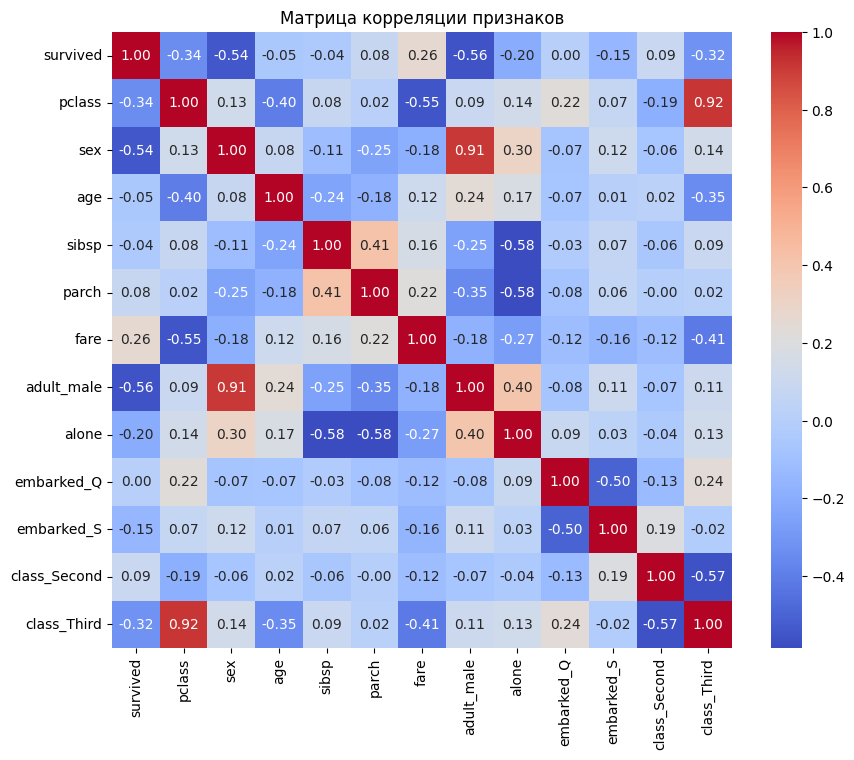

              survived    pclass       sex       age     sibsp     parch  \
survived      1.000000 -0.338481 -0.543351 -0.050504 -0.035322  0.081629   
pclass       -0.338481  1.000000  0.131900 -0.403858  0.083081  0.018443   
sex          -0.543351  0.131900  1.000000  0.080464 -0.114631 -0.245489   
age          -0.050504 -0.403858  0.080464  1.000000 -0.243452 -0.175799   
sibsp        -0.035322  0.083081 -0.114631 -0.243452  1.000000  0.414838   
parch         0.081629  0.018443 -0.245489 -0.175799  0.414838  1.000000   
fare          0.257307 -0.549500 -0.182333  0.120886  0.159651  0.216225   
adult_male   -0.557080  0.094035  0.908578  0.244111 -0.253586 -0.349943   
alone        -0.203367  0.135207  0.303646  0.170877 -0.584471 -0.583398   
embarked_Q    0.003650  0.221009 -0.074115 -0.070315 -0.026354 -0.081228   
embarked_S   -0.149683  0.074053  0.119224  0.007400  0.068734  0.060814   
class_Second  0.093349 -0.188432 -0.064746  0.022594 -0.055932 -0.000734   
class_Third 

In [87]:
import matplotlib.pyplot as plt
# Вычисление матрицы корреляции
correlation_matrix = data.corr()

# Визуализация матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Матрица корреляции признаков")
plt.show()

# Печать самой матрицы корреляции
print(correlation_matrix)

##Рефлексия
1. Целевая переменная - `survived`:
   - Она отрицательно коррелирует с `pclass` (-0.34), что указывает, что пассажиры из более низкого класса (например, 3-й класс) имели меньшие шансы выжить. Этот результат соответствует интуитивному предположению.
   - Сильная отрицательная корреляция также наблюдается между выживаемостью и полом (`sex`) (-0.54), что подтверждает, что женщины имели значительно больше шансов на выживание.
   - Положительная корреляция наблюдается с ценой билета (`fare`) (0.26), что говорит о том, что пассажиры с дорогими билетами имели чуть более высокий шанс выжить.

2. Классовая принадлежность:
   - Сильная отрицательная корреляция между `pclass` и `fare` (-0.55) показывает, что билеты класса 1 стоили дороже, чем билеты других классов.
   - Сильная положительная корреляция между `pclass` и `class_Third` (0.92) подтверждает дискретизацию классов для анализа.

3. Пол и возраст:
   - Переменная `sex` сильно коррелирует с `adult_male` (0.91), поскольку мужчины представлены среди взрослых.
   - Слабая корреляция между `age` и `survived` (-0.05) говорит о том, что возраст сам по себе был менее значительным фактором.

4. Семейные факторы:
   - Положительная корреляция между `sibsp` (количество братьев/сестёр и супругов на борту) и `parch` (количество родителей/детей на борту) (0.41) логична: пассажиры с больше родственников одной группы на борту чаще имели больше родственников другой.

5. Порты отправления:
   - Низкая корреляция переменных `embarked_Q`, `embarked_S` и `survived` свидетельствует об ограниченном влиянии порта отправления на выживаемость.

### Выводы:
- Главные предсказатели выживаемости: пол, класс проезда, а также стоимость билета, что показано значительными корреляциями.
- Переменные, такие как возраст, порт отправления и семейные факторы, имеют ограниченное влияние.

Проверим баланс классов

C:\Users\User\AppData\Local\Temp\ipykernel_3820\653367477.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


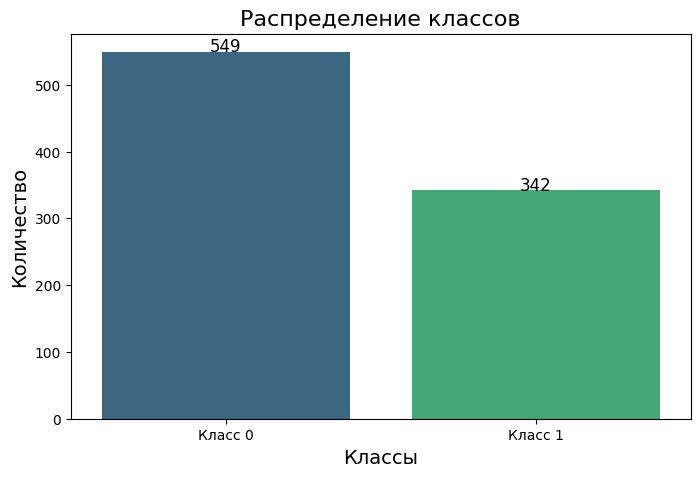

In [88]:
# Проверка баланса классов
class_counts = data.survived.value_counts()
# Построение графика
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

# Добавление аннотаций
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 0.5, str(v), fontsize=12, ha='center')

# Подписи осей и заголовок
plt.title("Распределение классов", fontsize=16)
plt.xlabel("Классы", fontsize=14)
plt.ylabel("Количество", fontsize=14)
plt.xticks([0, 1], labels=['Класс 0', 'Класс 1'])
plt.show()

Выживших у нас гораздо меньше, чем погибших

Выделим целевую переменную и разделим на обучающую и тестовую выборки

In [89]:
from sklearn.model_selection import train_test_split
# Разделение на X (признаки) и y (целевая переменная)
X = data.drop('survived', axis=1)
y = data['survived']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Обработка данных — это важный этап, так как модель в «сыром» виде с пропусками или текстовыми данными работать не сможет. Мы заполнили пропуски в данных (`age`), закодировали категории (например, пол) и удалили ненужные признаки.
- Это позволяет нам сделать данные «чистыми» и готовыми для работы с моделью дерева решений.

# Этап 4: Обучение дерева решений

#### Действия:
1. Построим модель дерева решений.
2. Обучим модель на тренировочных данных.
3. Оценим её качество на тестовых данных.

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Создаём модель дерева решений
tree = DecisionTreeClassifier(random_state=42, max_depth=5)  # Ограничим глубину для контроля переобучения

# Обучаем модель
tree.fit(X_train, y_train)

# Оцениваем качество
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy на тестовой выборке: {accuracy}")

Accuracy на тестовой выборке: 0.776536312849162


In [91]:
from sklearn.metrics import classification_report
# Получение отчета по классификации
report = classification_report(y_test, y_pred, target_names=["Класс 0", "Класс 1"])

# Вывод отчета
print(report)

              precision    recall  f1-score   support

     Класс 0       0.80      0.82      0.81       105
     Класс 1       0.74      0.72      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



Неплохая точность, но давайте проведем серию экспериментов с настройкой гиперпараметров для обучения модели дерева решений (например, с использованием библиотеки scikit-learn) и соберём результаты для анализа. Мы будем исследовать влияние различных параметров на метрики модели. Но сначала разберем значение гиперпараметров:
Давайте подробно разберем каждый из этих гиперпараметров и их значения:

---

### 1. **`criterion`: критерий для выбора разделения (split criterion)**
   Этот гиперпараметр указывает принцип, по которому проводится разбиение (split) узлов дерева. Основная задача дерева решений — при делении узла на два поддерева максимизировать "чистоту" (homogeneity) поддеревьев, чтобы группы данных в поддеревьях были как можно более схожими.

   #### Значения:
   - **`gini` (по умолчанию в scikit-learn)**:
     Используется **индекс Джини (Gini Impurity)** для оценки качества расщеплений. Индекс Джини измеряет вероятность неправильной классификации случайного элемента, если он случайно помечен в соответствии с распределением классов в подузле.

   - **`entropy`**:
     Основан на понятии **энтропии (Entropy)** из теории информации. Этропия вычисляет среднее количество информации (или неопределенности) в системе. При каждом сплите дерево старается минимизировать энтропию.
     **Ключевые отличия:**
     - `gini` и `entropy` ведут себя схожим образом, хотя `gini` обычно быстрее в вычислениях.
     - `entropy` более чувствительна к многообразию классов и может давать небольшие преимущества в задачах с большим количеством классов.

---

### 2. **`max_depth`: Максимальная глубина дерева**
   Эта настройка контролирует, насколько "глубоким" может стать дерево. Если ограничений нет (значение `None`), дерево будет продолжать разбиения, пока не достигнет максимальной степени "чистоты" (например, каждый лист содержит только элементы своего класса), или пока не удовлетворятся другие ограничения (`min_samples_leaf`, `min_samples_split` и т.д.).

   #### Значения:
   - **3, 5, 10**: установка небольшой глубины помогает предотвратить переобучение (overfitting), но при маленькой глубине модель может недообучаться (underfitting).
     - **Глубина 3**: это будет неглубокое дерево. Оно лучше всего подходит, если ваши данные достаточно просты или имеют небольшое количество признаков.
     - **Глубина 5 или 10**: увеличение глубины позволяет захватывать более сложные закономерности, но при больших значениях существует риск переобучения.
   - **`None`**: разделения будут продолжаться до тех пор, пока все листья не станут полностью чистыми (или пока не выполнены другие ограничения, например, минимальный размер сплита или листа). Это может привести к глубоким деревьям, что повышает риск переобучения.

---

### 3. **`min_samples_split`: Минимальное количество выборок для разделения узла**
   Этот гиперпараметр устанавливает минимальное количество элементов (выборок), которое должно быть в узле, чтобы он мог быть разделен на два подузла. Если количество элементов меньше заданного значения, узел считается "листом", и дальнейшего деления не будет.

   #### Значения:
   - **`2` (значение по умолчанию)**: каждый узел можно разделить, если в нем есть хотя бы 2 элемента (например, два образца с разными метками классов). Это может привести к "глубоким" деревьям с большим количеством узлов.
   - **`10`**: узел можно разделить, только если он содержит как минимум 10 элементов. Это делает структуру дерева более сбалансированной и устойчивой, так как модель избегает разбиений на основе небольших групп выборок.
   - **`20`**: узел можно разделить, только если в нем есть хотя бы 20 элементов. Определение такого высокого порога ограничивает глубину дерева и может улучшить его обобщающую способность, особенно на небольших и шумных данных.

---

### 4. **`min_samples_leaf`: Минимальное количество выборок в листовом узле**
   Этот гиперпараметр определяет минимальное количество элементов (выборок), которые должны оставаться в узле после его разделения. Если после разделения в одном из подузлов окажется меньше элементов, чем указано, разделение не будет произведено.

   #### Значения:
   - **`1` (значение по умолчанию)**: каждое разделение может привести к созданию листа, содержащего всего 1 элемент. Это позволяет дереву быть максимально детализированным, но повышает риск переобучения.
   - **`5`**: после разделения каждый лист должен содержать как минимум 5 элементов. Этот параметр помогает бороться с переобучением, создавая более крупные и устойчивые листья.
   - **`10`**: минимум 10 элементов в каждом листе. Это еще больше ограничивает детализацию дерева и делает его менее подверженным шуму, особенно на малых данных.

---

### Как выбирать значения этих параметров?
1. **Если ваши данные ограниченные или слабозашумленные:**
   - Небольшая глубина дерева (`max_depth=3` или `5`).
   - Большой порог для разделения (`min_samples_split=10-20` или `min_samples_leaf=5-10`) может помочь.

2. **Если ваши данные большие и сложные:**
   - Увеличение глубины дерева (`max_depth=10` или `None`).
   - Меньше ограничений на сплиты может быть полезно (`min_samples_split=2` и `min_samples_leaf=1`).

3. **Если данные зашумленные:**
   - Жесткие ограничения (например, `max_depth=5`, `min_samples_split=20`, `min_samples_leaf=10`) помогут избежать переобучения.


In [92]:
# Настройка параметров для экспериментов
param_grid = {
    "criterion": ["gini", "entropy"],  # критерий для выбора сплитов
    "max_depth": [3, 5, 10, None],     # максимальная глубина дерева
    "min_samples_split": [2, 10, 20], # минимальное количество выборок для сплита
    "min_samples_leaf": [1, 5, 10],   # минимальное количество выборок в листьях
}

results = []  # для записи результатов

# Перебор параметров
for criterion in param_grid["criterion"]:
    for max_depth in param_grid["max_depth"]:
        for min_samples_split in param_grid["min_samples_split"]:
            for min_samples_leaf in param_grid["min_samples_leaf"]:
                # Создаем модель
                model = DecisionTreeClassifier(
                    criterion=criterion,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    random_state=42
                )
                # Обучение модели
                model.fit(X_train, y_train)

                # Предсказания
                y_pred = model.predict(X_test)

                # Оценка точности
                accuracy = accuracy_score(y_test, y_pred)

                # Запись результатов
                results.append({
                    "criterion": criterion,
                    "max_depth": max_depth,
                    "min_samples_split": min_samples_split,
                    "min_samples_leaf": min_samples_leaf,
                    "accuracy": accuracy
                })

# Анализ результатов
results_df = pd.DataFrame(results)
print(results_df.sort_values("accuracy", ascending=False)[:10])  # Выводим отсортированные результаты, топ 10


   criterion  max_depth  min_samples_split  min_samples_leaf  accuracy
47   entropy        5.0                  2                10  0.821229
17      gini        5.0                 20                10  0.821229
53   entropy        5.0                 20                10  0.821229
50   entropy        5.0                 10                10  0.821229
14      gini        5.0                 10                10  0.821229
11      gini        5.0                  2                10  0.821229
0       gini        3.0                  2                 1  0.810056
1       gini        3.0                  2                 5  0.810056
7       gini        3.0                 20                 5  0.810056
6       gini        3.0                 20                 1  0.810056


###Рефлексия
Итак,  видно, что наилучшая точность (accuracy = 0.821229) была достигнута для следующих параметров:

- criterion: можно использовать как `gini`, так и `entropy`; изменения этого параметра не влияют на результат.
- max_depth: 5
- min_samples_split: 20
- min_samples_leaf: 10

### Модель с лучшими параметрами:

In [93]:
best_model = DecisionTreeClassifier(
    criterion='gini',  # или 'entropy'
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10
)
best_model.fit(X_train, y_train)

# Оцениваем качество
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy на тестовой выборке: {accuracy}")

Accuracy на тестовой выборке: 0.8212290502793296


In [94]:
# Получение отчета по классификации
report = classification_report(y_test, y_pred, target_names=["Класс 0", "Класс 1"])

# Вывод отчета
print(report)

              precision    recall  f1-score   support

     Класс 0       0.82      0.89      0.85       105
     Класс 1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



Попробуйте провести эксперименты самостоятельно, рекомендации по экспериментам:
1. Увеличьте/уменьшите `min_samples_split` и `min_samples_leaf`:
   - эти параметры контролируют переобучение. Если уменьшить их, дерево будет более сложным и склонным к переобучению. Если увеличить, то модель может стать проще, но с риском недообучения.

2. Варьируйте `max_depth`:
   - попробуйте значения больше 5 (например, 6 или 7) и меньше 5. Это может улучшить предсказания, если модель недообучена.

3. Измените `criterion`:
   - хотя `gini` и `entropy` приводят к аналогичной точности, в некоторых задачах один из вариантов может быть лучше.

4. Анализируйте влияние каждого параметра:
   - постройте графики зависимости точности от каждого из параметров, чтобы понять их влияние.


# Этап 5: Визуализация дерева решений

#### Действия:
1. Визуализируем дерево, чтобы понять, какие признаки важны при принятии решений.
2. Проанализируем, какие признаки используются для разделения данных.


 Визуализация дерева решений

In [95]:
# Конвертируем классы в строки
class_names = [str(cl) for cl in best_model.classes_]  # Преобразуем классы в строки

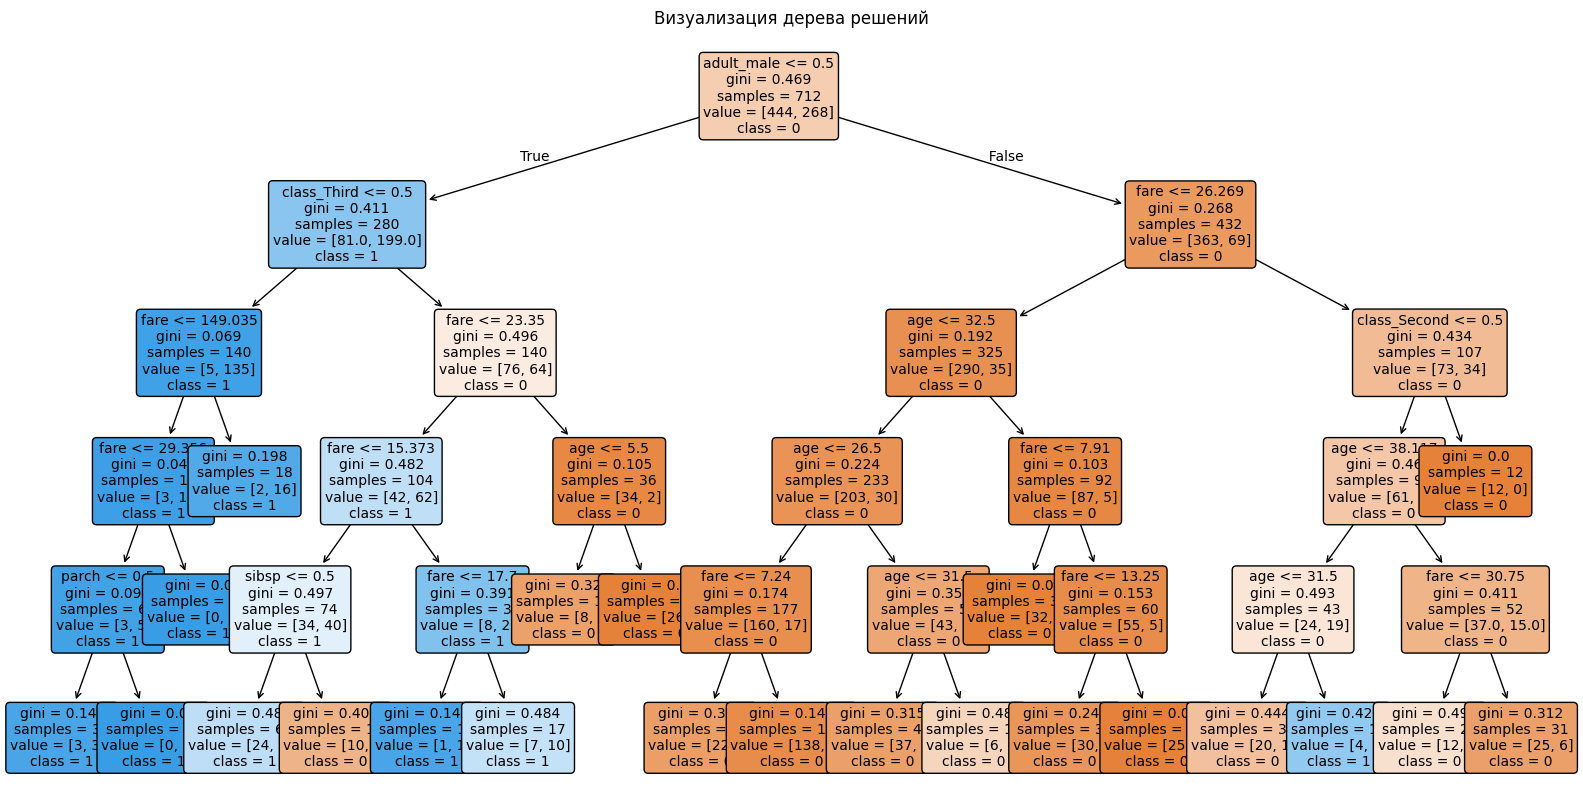

In [96]:
from sklearn.tree import  plot_tree
# Визуализация с помощью "plot_tree"
plt.figure(figsize=(20, 10))  # Увеличиваем размеры для читаемости
plot_tree(
    best_model,
    feature_names=X.columns,  # Подставляем названия признаков (если это pandas DataFrame)
    class_names=class_names,  # Классы модели
    filled=True,  # Раскраска узлов
    rounded=True,  # Округлить узлы
    fontsize=10    # Размер шрифта
)
plt.title("Визуализация дерева решений")
plt.show()

1. Корневой узел:
   - Корень дерева — начальная точка разбиения данных.
   - Первое разбиение происходит по признаку `adult_male <= 0.5`. Это говорит о важности признака, связанного с полом человека, при классификации.

2. Gini критерий:
   - Значение Gini индекса показывает степень неоднородности данных на каждом узле. Чем ближе Gini к 0, тем более однородны данные.
   - В узлах с большим количеством данных (samples) чаще наблюдаются более высокие значения Gini, их следует уточнять далее.

3. Распределение классов (выход):
   - В каждом узле указано распределение значений класса (например, `value = [81, 199]`).
   - В конечных узлах (листах) это становится итоговой классификацией — либо класс `0`, либо класс `1`.

4. Ключевые признаки:
   - Признаки, такие как `fare`, `age`, `class` и другие, играют важную роль в предсказаниях.
   - Например, билеты с высокой стоимостью (`fare > 149.035`) чаще ассоциируются с классом 1 (пассажиры спаслись), что можно наблюдать в соответствующих узлах.

5. Глубина дерева:
   - У дерева относительно большая глубина. Это может указывать на его склонность к переобучению.
   - Возможно, стоит провести регуляризацию или ограничить максимальную глубину дерева, чтобы избежать переобучения.

6. Дисбаланс классов:
   - Количество образцов классов `0` и `1` сильно различается (первоначально `444` против `268`). Это может быть вызовом для корректной классификации.


Дерево решений позволяет наглядно понять, как модель классифицирует данные, шаг за шагом уточняя предсказания. Визуализация помогает проанализировать модель на нескольких уровнях:

---

### 1. **Принятие решений**
- **Корень дерева** — первое разбиение, основанное на самой значимой переменной. Например, в данных о выживших на Титанике переменная "adult_male ≤ 0.5" разделяет пассажиров на группы по их полу и возрасту.
- **Ветвление** — каждый узел уточняет классификацию, последовательно проверяя другие переменные, такие как стоимость билета или возраст.
- **Листья** — конечные узлы представляют итоговое предсказание и показывают распределение классов (например, сколько человек выжили/не выжили в группе).

---

### 2. **Как улучшить модель**

#### 2.1. **Анализ важности признаков**
- Верхние узлы используют наиболее значимые переменные. Если значимый признак низко в дереве или отсутствует, нужно доработать данные.

#### 2.2. **Сложность модели**
- **Переобучение** (глубокие деревья): избежать можно, ограничив глубину или обрезая узлы (pruning).
- **Недообучение** (неглубокие деревья): увеличить глубину или добавить признаки.

#### 2.3. **Дисбаланс классов**
- Узлы с сильным перевесом классов (values) могут указывать на необходимость балансировки данных или изменения весов классов.

#### 2.4. **Неоднозначность разбиений**
- Узлы с высоким **gini** плохо разделяют данные. Возможно, необходимо добавить новые признаки или преобразовать существующие.

#### 2.5. **Избыточное разбиение**
- Узлы с очень малым числом объектов (samples) можно обрезать для упрощения модели.

---

### 3. **Выявление закономерностей**
- Визуализация дерева помогает интерпретировать влияние признаков. Например, возраст, пол и стоимость билета в анализе пассажиров Титаника оказывают ключевое влияние на результат.

---

### 4. **Оптимизация данных**
- Выявить недостаток данных (малое число samples в узлах).
- Добавить новые важные признаки или преобразовать существующие.

---

### Итог:
Визуализация дерева решений помогает интерпретировать модель, выявить ключевые закономерности, скорректировать данные и устранить ошибки, такие как переобучение или недостаточная сложность модели.

На лекции вы обсуждали, что деревья решений позволяют находить наиболее важные признаки. Важные признаки дают представление о том, какие факторы больше всего влияют на предсказания модели. При объяснении решения модели (особенно в задачах, где важно доверие к результатам) можно указать, почему те или иные объекты относятся к определенным классам.  
 При прогнозировании выживаемости пассажиров Титаника важно знать, что наиболее значимыми факторами, определяющими выживаемость, являются пол, класс каюты и возраст.

Анализ важности признаков необходим для:
- Улучшения понимания работы модели,
- Ускорения вычислений за счет исключения нерелевантных признаков,
- Оптимизации данных,
- Упрощения и диагностики модели,
- Обоснования предсказаний и выполнения интерпретации данных для бизнеса или исследований.


Рейтинг важности признаков:
1. adult_male: 0.5716
2. class_Third: 0.1995
3. fare: 0.1614
4. age: 0.0389
5. class_Second: 0.0151
6. sibsp: 0.0124
7. parch: 0.0010
8. embarked_S: 0.0000
9. embarked_Q: 0.0000
10. alone: 0.0000
11. sex: 0.0000
12. pclass: 0.0000


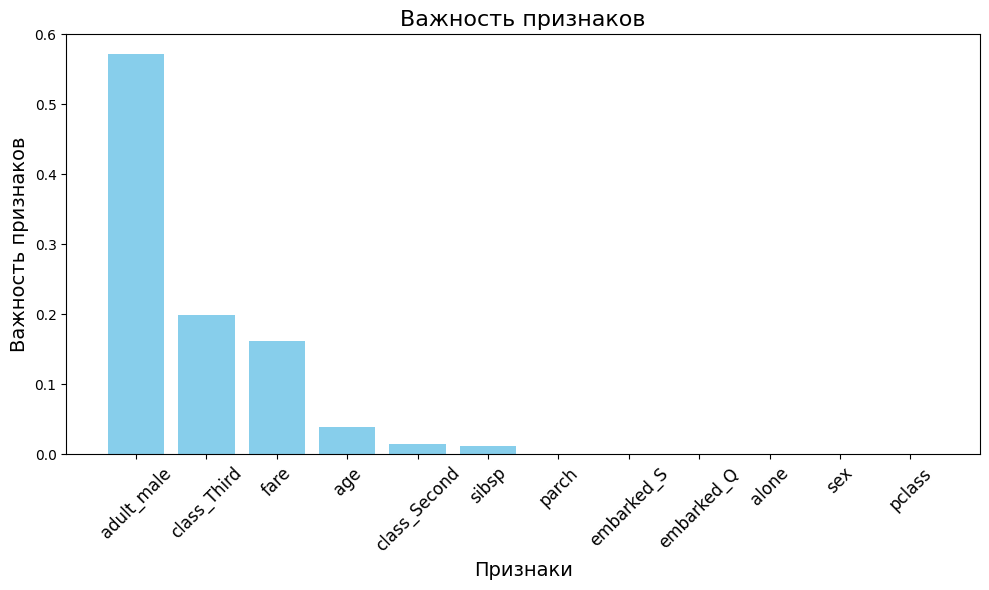

In [97]:
import numpy as np
feature_names = X.columns
# Извлекаем важность признаков
importances = best_model.feature_importances_

# Сортируем признаки по важности
indices = np.argsort(importances)[::-1]

# 1. Вывод наиболее важных признаков текстом
print("Рейтинг важности признаков:")
for i in range(len(feature_names)):
    print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

# 2. Визуализация важности признаков на графике
plt.figure(figsize=(10, 6))
plt.title("Важность признаков", fontsize=16)
plt.bar(range(len(feature_names)), importances[indices], align="center", color="skyblue")
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=45, fontsize=12)
plt.xlabel("Признаки", fontsize=14)
plt.ylabel("Важность признаков", fontsize=14)
plt.tight_layout()
plt.show()

Давайте попробуем обучить нашу модель на наиболее важных признаках

In [80]:
# Выбираем только важные признаки
important_features = ['adult_male', 'pclass', 'fare', 'age', 'class_Second', 'sibsp']
X = data[important_features]
y = data['survived']  # Целевая переменная

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели
best_model.fit(X_train, y_train)

# Предсказания
y_pred = best_model.predict(X_test)

# Вывод отчета о классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       157
           1       0.87      0.61      0.72       111

    accuracy                           0.80       268
   macro avg       0.82      0.77      0.78       268
weighted avg       0.81      0.80      0.79       268



Метрики ухудшились, мы не генерировали признаки, что могло бы сделать качество модели еще лучше.


#### Общий итог
В практике мы:
1. Научились подготавливать данные для работы с алгоритмом дерева решений.
2. Построили и обучили модель на основе деревьев решений, выделив значимые признаки.
3. Визуализировали результаты, чтобы лучше понять процессы, происходящие внутри модели.
4. Оценили качество работы модели с помощью метрик, определив сильные и слабые стороны предсказаний.

Мы достигли хороших результатов: получили базовые знания о работе алгоритма, научились применять его на практике и интерпретировать его результаты. Это важно как для совершенствования навыков анализа данных, так и для дальнейшего прохождения более сложных тем, таких как ансамблевые методы.

---

#### Как это поможет в будущем
Работа с деревьями решений заложила фундамент для понимания более сложных и мощных алгоритмов, например, случайных лесов и градиентного бустинга. Полученные знания также пригодятся для анализа данных в бизнесе, поскольку с помощью деревьев мы можем не только делать предсказания, но и выявлять ключевые факторы, влияющие на результат.

---

### Итоговое замечание:
Данная практика дала понимание того, как работает один из самых интерпретируемых алгоритмов машинного обучения. Мы провели полный цикл работы с моделью — от подготовки данных до оценки результатов. Это важный шаг на пути к интуитивному и профессиональному владению инструментами анализа данных.